In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from datetime import datetime
import sqlite3

In [3]:
dbname = "Group24_NS_Project.db"
conn = sqlite3.connect(dbname)

In [4]:
db_data = pd.read_sql_query("SELECT * FROM pcap_16_09_29", conn)

In [13]:
print(db_data.head())

   ID        Time  Size            MAC_Src            MAC_Dst         IP_Src  \
0   1  1475071201   156  30:8c:fb:2f:e4:b2  14:cc:20:51:33:ea  192.168.1.106   
1   2  1475071201    66  14:cc:20:51:33:ea  30:8c:fb:2f:e4:b2  52.87.241.159   
2   6  1475071202   174  70:ee:50:18:34:43  14:cc:20:51:33:ea  192.168.1.241   
3  10  1475071202   174  14:cc:20:51:33:ea  70:ee:50:18:34:43   52.8.241.183   
4  15  1475071202   156  30:8c:fb:2f:e4:b2  14:cc:20:51:33:ea  192.168.1.106   

          IP_Dst  Protocol_IP  Port_Src  Port_Dst  
0  52.87.241.159            6     47940       443  
1  192.168.1.106            6       443     47940  
2   52.8.241.183           17     52925      4500  
3  192.168.1.241           17      4500     52925  
4  52.87.241.159            6     47940       443  


In [ ]:
iot_devices = ['d0:52:a8:00:67:5e', '44:65:0d:56:cc:d3', '70:ee:50:18:34:43', 'f4:f2:6d:93:51:f1', '00:16:6c:ab:6b:88', '30:8c:fb:2f:e4:b2', '00:62:6e:51:27:2e', 'e8:ab:fa:19:de:4f', '00:24:e4:11:18:a8', 'ec:1a:59:79:f4:89', '50:c7:bf:00:56:39', '74:c6:3b:29:d7:1d', 'ec:1a:59:83:28:11', '18:b4:30:25:be:e4', '70:ee:50:03:b8:ac', '00:24:e4:1b:6f:96', '74:6a:89:00:2e:25', '00:24:e4:20:28:c6', 'd0:73:d5:01:83:08', '18:b7:9e:02:20:44', 'e0:76:d0:33:bb:85', '30:8c:fb:b6:ea:45']
print(iot_devices)

In [ ]:
size = []
time = []
port_dest = []
port_dest_freq = []
port_src = []
port_src_freq = []

for index, row in db_data.iterrows():
    if row['Time'] in time:
        size[time.index(row['Time'])] += int(row['Size'])
    else:
        time.append(int(row['Time']))
        size.append(int(row['Size']))
        
    if row['Port_Dst'] in port_dest:
        port_dest_freq[port_dest.index(row['Port_Dst'])] += 1
    else:
        port_dest.append(row['Port_Dst'])
        port_dest_freq.append(1)
    
    if row['Port_Src'] in port_src:
        port_src_freq[port_src.index(row['Port_Src'])] += 1
    else:
        port_src.append(row['Port_Src'])
        port_src_freq.append(1)

In [17]:
time1 = [int(datetime.fromtimestamp(i).strftime("%H%M")) for i in time]
time2 = []
size2 = []
t = time1[0]
s = 0
for i in range(len(time1)):
    if t == time1[i]:
        s += size[i]
    else:
        size2.append(s)
        s = size[i];
        time2.append(t)
        t = time1[i]
size2 = [i / (1024) for i in size2]
tsort = []
ssort = []
tsort_r = []
ssort_r = []
for t,s in sorted(zip(time2,size2)):
    tsort.append(t)
    ssort.append(s)
    if t >= 1700 and t <= 1800:
        tsort_r.append(t)
        ssort_r.append(s)

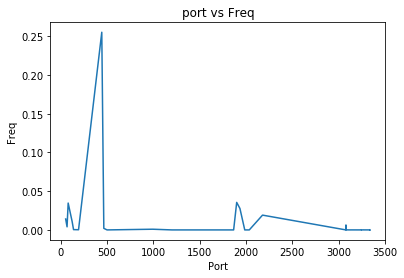

In [20]:
zipped_lists = zip(port_dest, port_dest_freq)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
port_dest, port_dest_freq = [list(tuple) for tuple in  tuples]

total_len = db_data[db_data.columns[9]].count()

port_dest_prob = [ i/total_len for i in port_dest_freq]

plt.plot(port_dest[:250], port_dest_prob[:250])
plt.title('Port vs Freq')
plt.xlabel('Port')
plt.ylabel('Freq')
plt.show()

100 236574


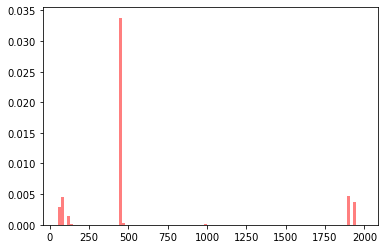

In [23]:
col_one_list = db_data['Port_Dst'].tolist()
prt = []
for i in col_one_list:
    if(i < 2000):
        prt.append(i)

num_bins = 100
n, bins, patches = plt.hist(prt, num_bins, facecolor='red', alpha=0.5, density=True)
print(len(n), len(prt))
plt.show()